## No Oversampling

0.17 %
16.81 %
33.44 %
50.08 %
66.72 %
83.36 %
100.00 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

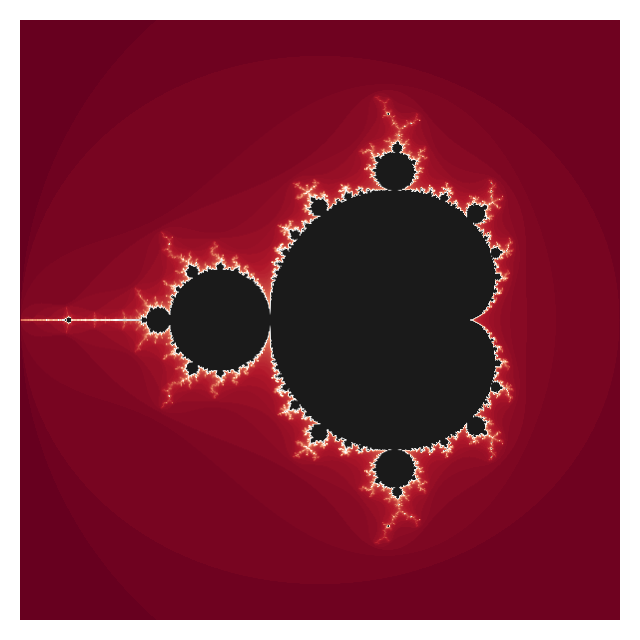

In [1]:
from google.colab import files
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

x_min = -2
x_max = 1
y_min = -1.5
y_max = 1.5
x_range = x_max - x_min
y_range = y_max - y_min
radius = 2
resolution = 0.005
iterations = 128
x_n = int(x_range/resolution)
y_n = int(y_range/resolution)

xs = np.linspace(x_min, x_max, x_n+1, endpoint=True)
ys = np.linspace(y_min, y_max, y_n+1, endpoint=True)

diverge_after = [[0] * (y_n + 1) for i in range(x_n + 1)]

x = x_min
y = y_min


def iterate(a, b):
    z_a = 0
    z_b = 0
    i = 0
    count = 0
    end = False
    while i < iterations and not end:
        z_a_old = z_a
        z_b_old = z_b
        z_a = z_a_old*z_a_old - z_b_old*z_b_old + a
        z_b = z_a_old*z_b_old + z_b_old*z_a_old + b
        r = math.sqrt(z_a*z_a + z_b*z_b)
        if r <= radius:
            count += 1
        else:
            end = True
        i += 1
    return count


for i in range(y_n + 1):
    for j in range(x_n + 1):
        diverge_after[i][j] = iterate(x, y)
        x += resolution
    x = x_min
    y += resolution
    if i % 100 == 0:
        progress = 100 * (i + 1) / (y_n + 1)
        print("%.2f" % progress, "%")

diverge_after_power = np.power(diverge_after, 0.9)

x_value, y_value = np.meshgrid(xs, ys)
reference_pixel_density = 1/resolution

fig, ax = plt.subplots(figsize=(x_range, y_range), dpi=reference_pixel_density)
#ax.pcolormesh(xs, ys, diverge_after, cmap=cm.RdGy)
ax.imshow(diverge_after_power, origin='lower', cmap=cm.RdGy)
ax.set_axis_off()
ax.set_aspect(1)
fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.savefig(fname='figure.png')
#plt.show()

files.download('figure.png')

## 2D Oversampling

### 1. Perform Calculations

In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

x_min = -2
x_max = 1
y_min = -1.5
y_max = 1.5
x_range = x_max - x_min
y_range = y_max - y_min
radius = 2
image_resolution = 0.001
linear_oversampling = 2
oversampling_resolution = image_resolution/linear_oversampling
iterations = 1024
x_n = int(x_range/image_resolution)
y_n = int(y_range/image_resolution)

diverge_after = [[0] * (y_n) for i in range(x_n)]


def iterate(a, b):
    z_a = 0
    z_b = 0
    i = 0
    count = 0
    end = False
    while i < iterations and not end:
        z_a_old = z_a
        z_b_old = z_b
        z_a = z_a_old*z_a_old - z_b_old*z_b_old + a
        z_b = z_a_old*z_b_old + z_b_old*z_a_old + b
        r = math.sqrt(z_a*z_a + z_b*z_b)
        if r <= radius:
            count += 1
        else:
            end = True
        i += 1
    return count


for i in range(x_n):
    x_p = x_min + i*image_resolution + 0.5*oversampling_resolution
    for j in range(y_n):
        y_p = y_min + j*image_resolution + 0.5*oversampling_resolution
        for xos in range(linear_oversampling):
            x = x_p + xos*oversampling_resolution
            for yos in range(linear_oversampling):
                y = y_p + yos*oversampling_resolution
                diverge_after[i][j] += iterate(x, y)
    if (i+1) % 100 == 0:
        progress = 100 * (i + 1) / x_n
        print("%.2f" % progress, "%")

3.33 %
6.67 %
10.00 %
13.33 %
16.67 %
20.00 %
23.33 %
26.67 %
30.00 %
33.33 %
36.67 %
40.00 %
43.33 %
46.67 %
50.00 %
53.33 %
56.67 %
60.00 %
63.33 %
66.67 %
70.00 %
73.33 %
76.67 %
80.00 %
83.33 %
86.67 %
90.00 %
93.33 %
96.67 %
100.00 %


### 2. Create Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

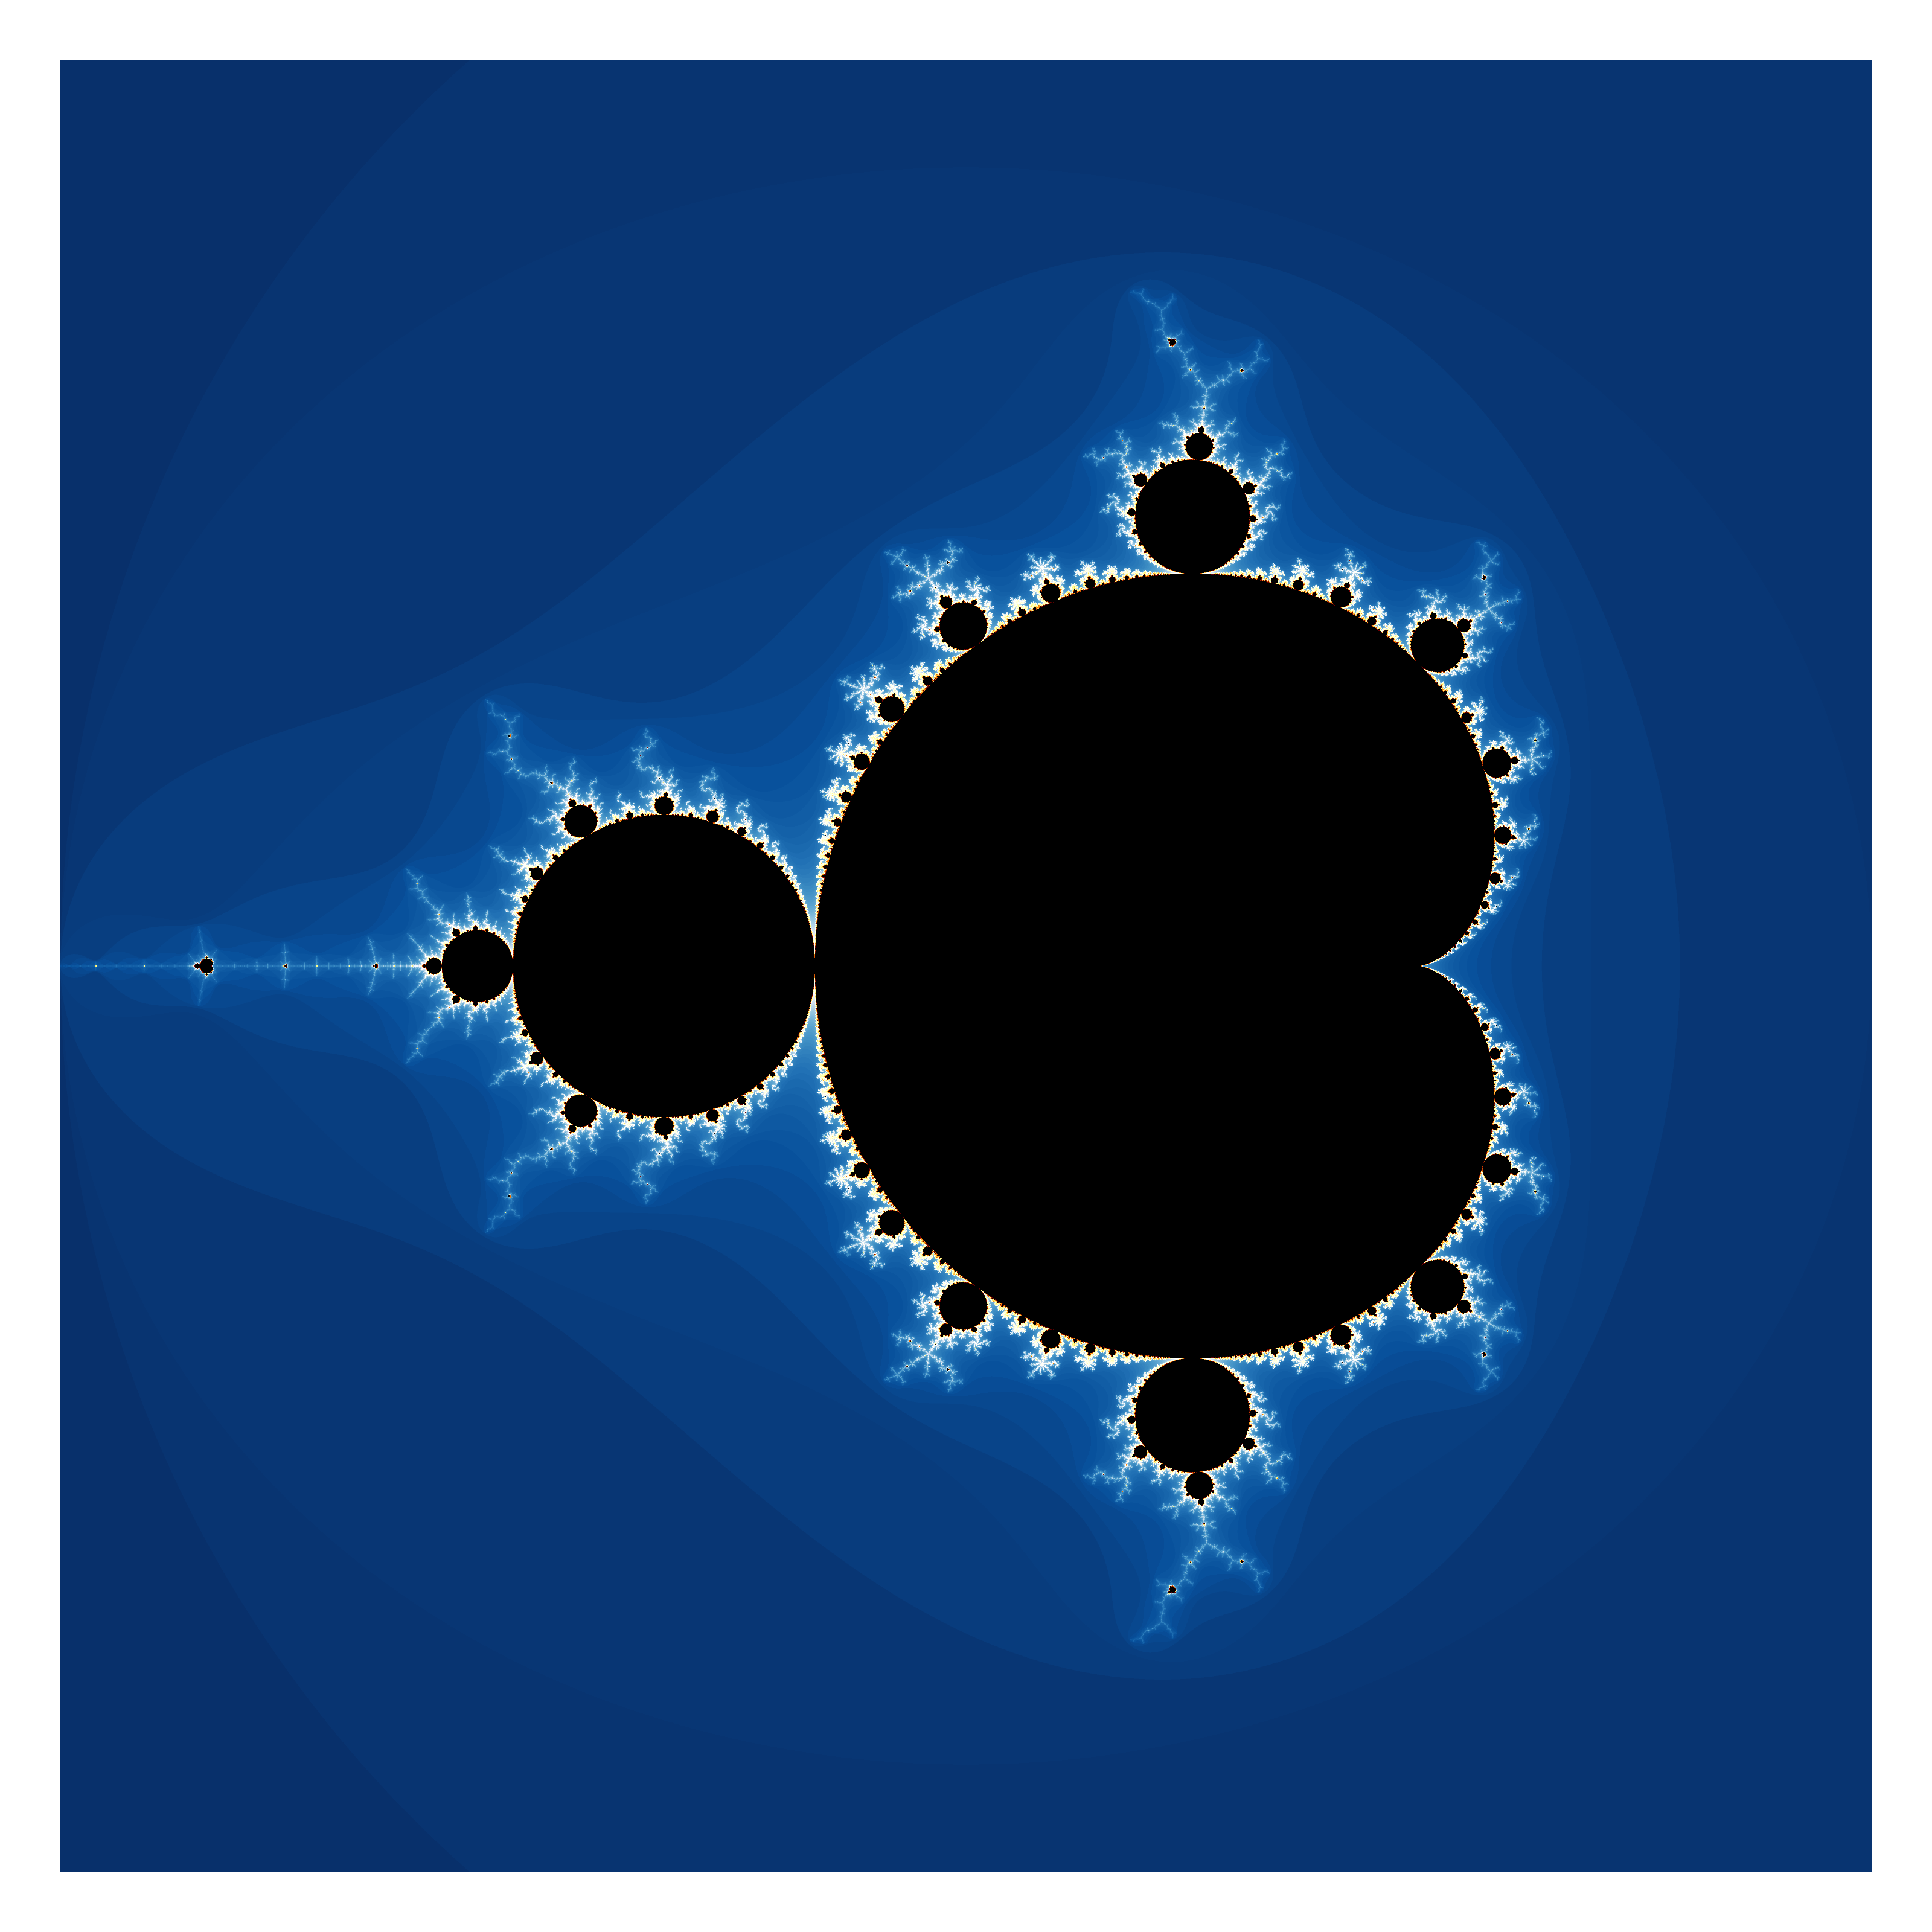

In [ ]:
import copy
from google.colab import files
import matplotlib.colors as mcolors

diverge_after0 = copy.deepcopy(diverge_after)
diverge_after1 = np.array(diverge_after0)
diverge_after1 = np.true_divide(diverge_after1, iterations*np.power(linear_oversampling, 2))

#diverge_after1 = np.power(diverge_after1, 0.7)
#diverge_after1 = diverge_after1 + np.sin(np.pi*diverge_after1)/(2*np.pi)
#diverge_after1 = -1 * np.power(-1*diverge_after1 + 1, 5) + 1

factor = 8

for i in range(x_n):
    for j in range(y_n):
        if diverge_after1[i][j] < (0.5/factor):
            diverge_after1[i][j] *= factor
        else:
            slope = 0.5/(1-0.5/factor)
            diverge_after1[i][j] = slope*diverge_after1[i][j] + 0.5 - slope*(0.5/factor)

mandelbrot = np.transpose(diverge_after1)
reference_pixel_density = 1/image_resolution

colors1 = plt.cm.Blues_r(np.linspace(0, 1, 128))
colors2 = plt.cm.afmhot_r(np.linspace(0, 1, 128))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

def plot_no_axis(data):
    fig, ax = plt.subplots(figsize=(x_range, y_range), dpi=reference_pixel_density)
    ax.imshow(mandelbrot, origin='lower', extent=[x_min,x_max,y_min,y_max], cmap=mymap, interpolation='antialiased')
    ax.set_axis_off()
    fig.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
    plt.savefig(fname='figure.png')
    files.download('figure.png')


def plot_with_axis(data):
    fig, ax = plt.subplots(figsize=(1.25*x_range, 1.25*y_range), dpi=reference_pixel_density)
    ax.imshow(mandelbrot, origin='lower', extent=[x_min,x_max,y_min,y_max], cmap=cm.RdGy)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.1)
    ax.tick_params(axis='both', which='major', length=0.5, width=0.1, pad=0.5, labelsize=2)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.savefig(fname='figure.png')
    files.download('figure.png')


plot_no_axis(mandelbrot)
#plot_with_axis(mandelbrot)